In [1]:
import pickle
wi = pickle.load(open('wi_data/wi_160.pkl', 'rb'))
wi.load_density_mapping('wi_data/wi_density_160.npy')

/Users/pjrule/anaconda3/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


In [4]:
from json import load
import os
ROOT_DIR = "/Users/pjrule/elbridge-wi-random-test"
maps = {}
for f in os.listdir(ROOT_DIR):
    if f.endswith('.json'):
        maps[f.replace('.json', '')] = load(open(os.path.join(ROOT_DIR, f)))

In [6]:
import operator
polsby = {}
for m in maps: polsby[m] = maps[m]['overall']['mean_polsby_popper']
sorted_polsby = sorted(polsby.items(), key=operator.itemgetter(1))

In [12]:
import numpy as np
import matplotlib.pyplot as plt
for h, score in sorted_polsby[-10:]:
    alloc = np.zeros(len(wi.df))
    for district_idx, vtds in enumerate(maps[h]['districts']):
        for vtd in vtds['vtds']:
            alloc[int(vtd)] = int(district_idx)
    wi.df['alloc'] = alloc
    wi.df.plot(column='alloc')
    plt.axis('off')
    #plt.title('Polsby-Popper score: {:.4f}'.format(score))
    plt.savefig('polsby_{:.4f}.png'.format(score), dpi=300, transparent=True, bbox_inches='tight')
    plt.close()

In [13]:
hull = {}
for m in maps: hull[m] = maps[m]['overall']['mean_convex_hull']
sorted_hull = sorted(hull.items(), key=operator.itemgetter(1))
for h, score in sorted_hull[-10:]:
    alloc = np.zeros(len(wi.df))
    for district_idx, vtds in enumerate(maps[h]['districts']):
        for vtd in vtds['vtds']:
            alloc[int(vtd)] = int(district_idx)
    wi.df['alloc'] = alloc
    wi.df.plot(column='alloc')
    plt.axis('off')
    #plt.title('Convex hull score: {:.4f}'.format(score))
    plt.savefig('hull_{:.4f}.png'.format(score), dpi=300, transparent=True, bbox_inches='tight')
    plt.close()

In [21]:
import geopandas as gpd
cb2017 = gpd.read_file('/Users/pjrule/Downloads/cb_2017_us_cd115_500k (2)/cb_2017_us_cd115_500k.shp')
cb2017 = cb2017.to_crs({'init': 'esri:102003'})
wi2017 = cb2017[cb2017.STATEFP=='55']

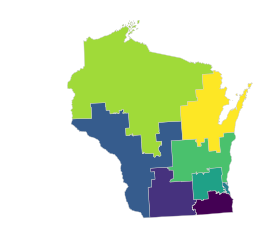

In [73]:
wi2017.plot(linewidth=0.4, edgecolor='#cdcdcd', column='CD115FP', cmap='viridis')
plt.axis('off')
plt.savefig('cd2017.png', dpi=600, transparent=True, bbox_inches='tight')
plt.show()

In [66]:
from shapely.ops import unary_union
h, score = sorted_polsby[-1]
polsby_districts = []
for dist in maps[h]['districts']:
    polsby_districts.append(unary_union(wi.df.iloc[dist['vtds']].geometry))
polsby_df = gpd.GeoDataFrame([{'district': idx, 'geometry': dist} for idx, dist in enumerate(polsby_districts)])
polsby_df.plot(linewidth=0.4, edgecolor='#cdcdcd', column='district', cmap='viridis')
plt.axis('off')
plt.savefig('polsby.png', dpi=600, transparent=True, bbox_inches='tight')
plt.show()

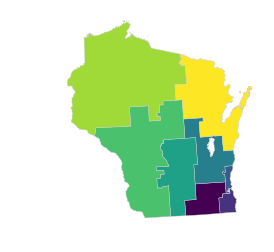

In [71]:
from shapely.ops import unary_union
h, score = sorted_hull[-1]
hull_districts = []
for dist in maps[h]['districts']:
    hull_districts.append(unary_union(wi.df.iloc[dist['vtds']].geometry))
hull_df = gpd.GeoDataFrame([{'district': idx, 'geometry': dist} for idx, dist in enumerate(hull_districts)])
hull_df.plot(linewidth=0.4, edgecolor='#cdcdcd', column='district', cmap='viridis')
plt.axis('off')
plt.savefig('hull.png', dpi=600, transparent=True, bbox_inches='tight')
plt.show()

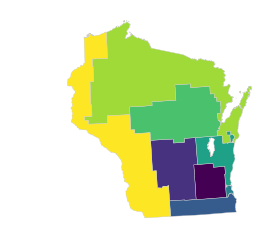